In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import Dataloa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [ ]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()                              #instantiating our nn model
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
torch.manual_seed(41)   #Picking a manual seed for randomization
model = Model()         #creating instance of a model

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Versicolor',1.0)
df['variety'] = df['variety'].replace('Virginica',2.0)

<ipython-input-6-3d88f88a4008>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica',2.0)


In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df['variety'].value_counts()

,count
variety,
0.0,50
1.0,50
2.0,50


In [ ]:
X = df.drop('variety',axis=1)
y = df['variety']
X = X.values
y = y.values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)



In [ ]:
y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10 ==0 :
    print(f'Epoch: {i}, loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0, loss: 1.125203251838684
Epoch: 10, loss: 1.0097211599349976
Epoch: 20, loss: 0.8162347674369812
Epoch: 30, loss: 0.585993230342865
Epoch: 40, loss: 0.4003389775753021
Epoch: 50, loss: 0.26794716715812683
Epoch: 60, loss: 0.1796349585056305
Epoch: 70, loss: 0.12165623158216476
Epoch: 80, loss: 0.0860651507973671
Epoch: 90, loss: 0.06522614508867264


Text(0, 0.5, 'epochs')

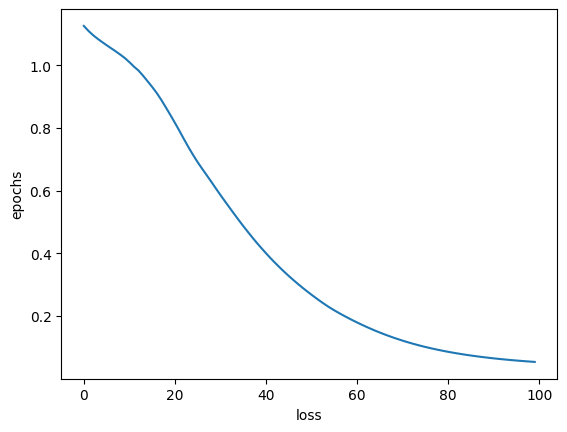

In [ ]:
plt.plot(range(epochs),losses)
plt.xlabel('loss')
plt.ylabel('epochs')

In [ ]:
#evaluating model on the test data
with torch.no_grad():   #turning off back propogation
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)


In [ ]:
loss

tensor(0.1315)

In [ ]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1
  print(f'Total no of corrects:{correct}')



1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.) tensor([-2.6161,  4.5584

In [ ]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])
